In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from radialscope import RadialScope as rs
from radialscope import draw_with_indeces
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import svgutils.compose as sc
from IPython.display import SVG, HTML
import numpy as np
import pandas as pd


RDKit WARNING: [22:46:50] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
df = pd.read_csv('./data/mps.csv', sep=';')

In [3]:
df.head(2)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL3092035,NaN,0,412.49,0,4.89,28,COc1cc(ccc1Nc2ncc3cccc(c4ccccc4)c3n2)N5CCOCC5,IC50,'=',...,CHEMBL394,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372
1,CHEMBL3092030,NaN,0,484.63,0,3.77,17,COc1cc(ccc1Nc2ncc3ccn(C4CCCCC4)c3n2)N5CCN(CC5)...,IC50,'=',...,CHEMBL394,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372


In [4]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID'],
      dtype='object')

In [5]:
mols = [Chem.MolFromSmiles(smi) for smi in df.Smiles]

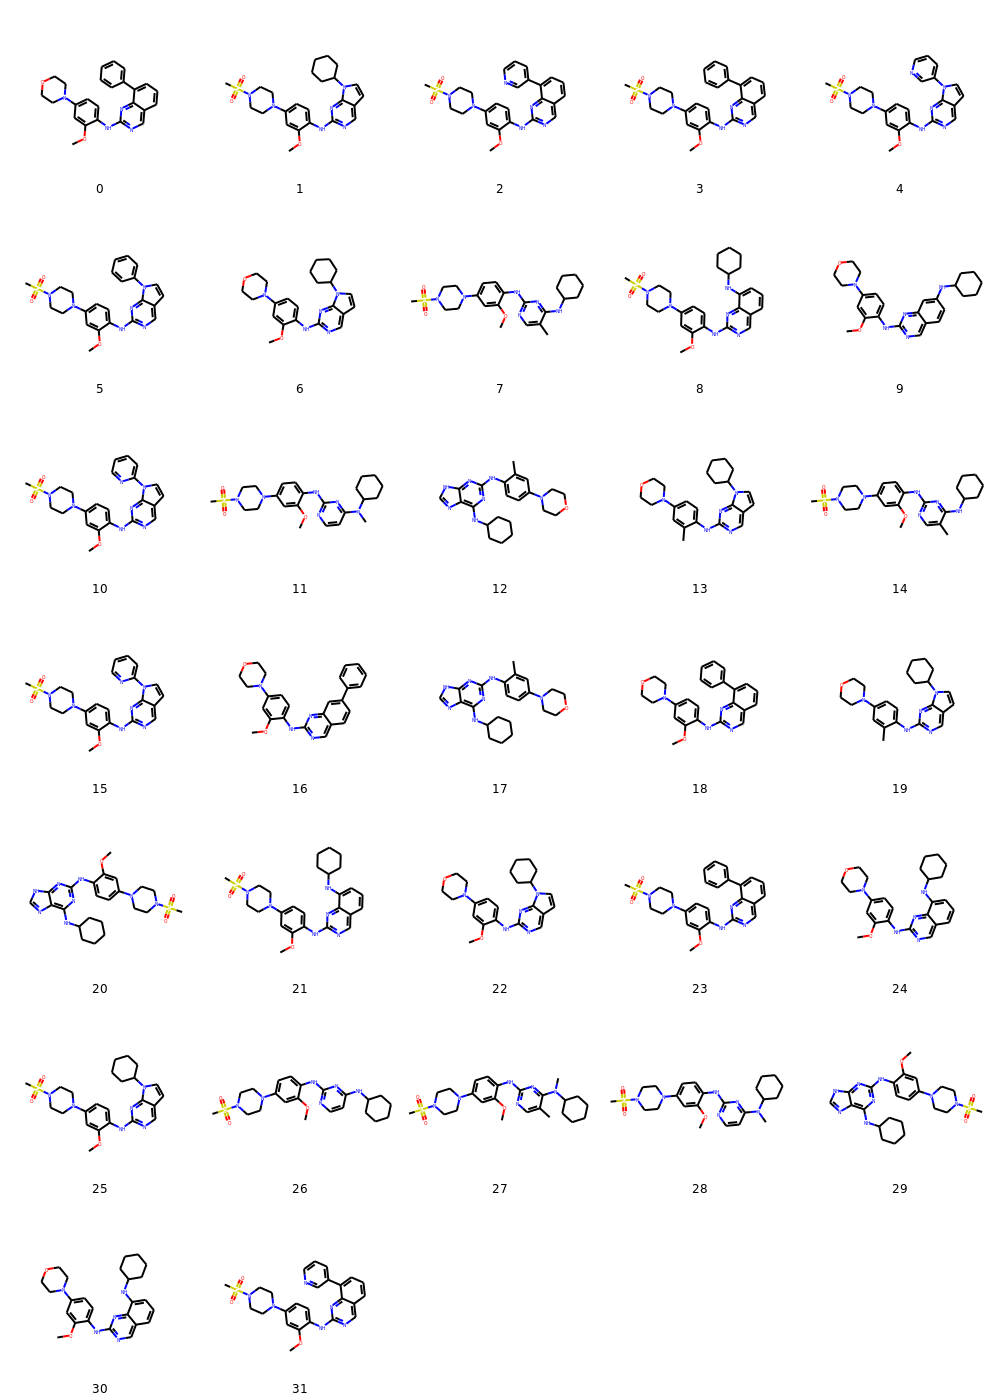

In [6]:
Draw.MolsToGridImage(mols, molsPerRow=5, legends=[str(i) for i in range(len(mols))])

In [7]:
core = Chem.MolFromSmiles('c2cn(C1CCCCC1)c3ncncc23')
templ =  Chem.MolFromSmiles('c2cn(C1CCCCC1)c3nc(C)ncc23')

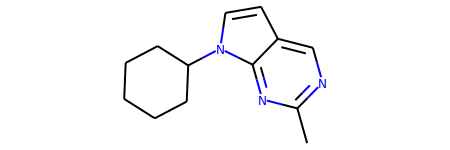

In [8]:
templ

In [9]:
matchmols = []
AlogP = []
std_val = []
for idx, mol in enumerate(mols):
    if mol.HasSubstructMatch(core):
        matchmols.append(mol)
        AlogP.append(df.AlogP[idx])
        pIC50 = np.round(9-np.log10(df['Standard Value'][idx]),2)
        std_val.append(pIC50)

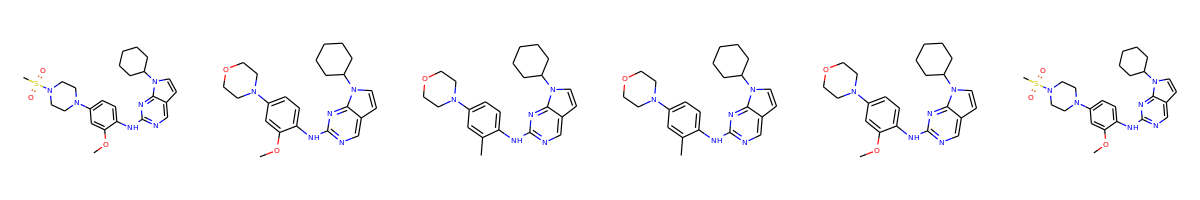

In [10]:
Draw.MolsToImage(matchmols)

In [11]:
rg = []
for mol in matchmols:
    sc = Chem.ReplaceCore(mol,core)
    sc = Chem.MolToSmiles(sc).replace('[1*]', '~')
    rg.append(sc)

In [12]:
settings={ 'SMILESSTRING':Chem.MolToSmiles(templ),  # use methyl groups for your rests, smiles strings can't use labels
  'use_bw_atom_theme':False,  # draw all atoms black
 'use_bold_font': True, # replace all fonts wherever possible with bold text
 'white_cutoff': 0,  #make text of labels white if greater than this number
  'scalefactor':0.7  #scale the total plot in the end, for large molecule you will need to decrease this or make the viewbox bigger in a vector software such as Inkscape
}

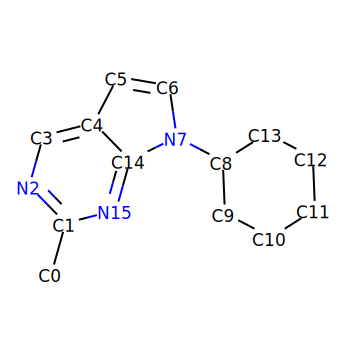

In [13]:
SVG(draw_with_indeces(settings))

In [14]:
radial_scope_setup_R1= {
    'rest_label':"R$_1$", # Label of the atom in the radial scope plot
    'no_wedges':len(rg), # Number of wedges in the Radial scope Plot
    'coverangle_wedges':180, # Degrees of a full circle the Rscope should cover
    'startangle':-30, #Start angle of the Rscope 
    'CMAPINNER':"Blues",  # Colormap of the inner circle. Max value has full color, options see below
    'CMAPOUTER':"RdPu", # Colormap of the outer circle. Max value has full color
    'OUTERLABEL':"pIC50", # Label of the outer circle
    'INNERLABEL':"AlogP", # Label of the inner circle
    'value_inner_circle':AlogP,
    'value_outer_circle':std_val,
    'rounding':True, # ENABLE rounding if you want something like >99 
    'rounding_boundary':10,  # cutoff for displaying > 
    'value_groups':rg, # Labels for the outer circle, you can use math using $, any ~ will be interpreted as smiles string
    'attach_atom_id': 0,
    
}

In [15]:
scope_plot=rs(settings, radial_scope_setup_R1) # add all radial_scope dictionaries to this call
SVG('substrate_scope_replaced.svg')

File written to: /home/takayuki/dev/sandbox/rdk/substrate-scope-plot/substrate_scope_replaced.svg
